In [27]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [6]:
# loading the dataset
loan_dataset = pd.read_csv(r"C:\Users\athar\Downloads\archive (5)\train_u6lujuX_CVtuZ9i (1).csv")

In [8]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_dataset.shape

(614, 13)

In [14]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# droppimg the null values
loan_dataset = loan_dataset.dropna(how='any')

In [20]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: ylabel='Education'>

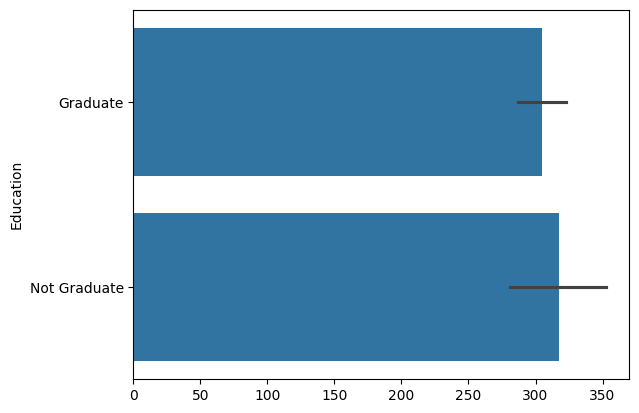

In [22]:
sns.barplot(loan_dataset.Education)

<Axes: xlabel='Property_Area', ylabel='count'>

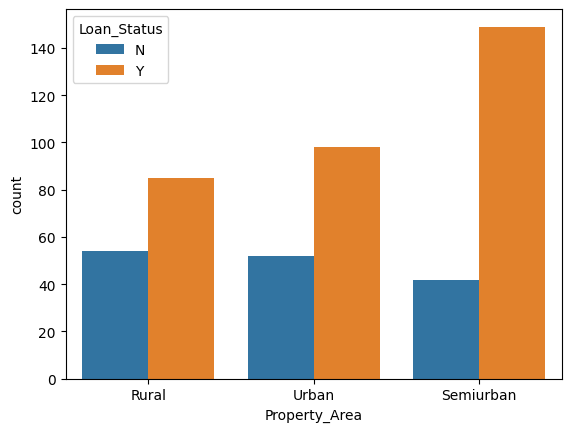

In [25]:
sns.countplot(x='Property_Area', hue = 'Loan_Status',data=loan_dataset)

In [26]:
# label encoding

In [29]:
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)
                                     

C:\Users\athar\AppData\Local\Temp\ipykernel_30492\3541173421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_30492\3541173421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)


In [30]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [31]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [37]:
loan_dataset =loan_dataset.replace(to_replace='3+', value = 4)

In [38]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [82]:
# converting categorical values to numerical values
loan_dataset.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_30492\3451592233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


In [83]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [84]:
# So now every value has turened into numeric values, So we can split the data

In [85]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [86]:
Y = loan_dataset['Loan_Status']

In [87]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [88]:
# spliting the data into training data and testing data

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [90]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [91]:
print(X_train)
print(Y_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
122       0        0          0          1              0             2137   
498       1        1          1          1              1             2895   
144       1        1          2          1              0            11757   
217       1        1          0          1              0             3727   
362       1        1          0          1              0             4750   
..      ...      ...        ...        ...            ...              ...   
72        1        0          0          1              0             3500   
390       1        0          4          1              0             9167   
76        1        0          0          1              0             3750   
286       0        0          0          1              1             2600   
376       1        1          4          1              0             8750   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [92]:
# Model Training - SVM

In [95]:
classifier = svm.SVC(kernel='linear')

In [100]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [101]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [102]:
print(training_data_accuracy)

0.8055555555555556


In [103]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [104]:
print(test_data_accuracy)

0.8333333333333334


In [105]:
# Making a predictive System

In [121]:
input_data =('Male','Yes',2,'Graduate','No',1299,1086,17,120,1,'Urban')
#converting input_data into pandas dataframe
input_df = pd.DataFrame([input_data],columns=['Gender','Married','Dependents',  'Education',  'Self_Employed', 'ApplicantIncome','CoapplicantIncome',  'LoanAmount',  'Loan_Amount_Term',  'Credit_History','Property_Area'])

input_df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

prediction_model = classifier.predict(input_df)


In [122]:
print(prediction_model)

[1]


In [123]:
print(prediction_model)
print('Loan Approved'if prediction_model[0] == 1 else 'Loan Not Approved')

[1]
Loan Approved


In [124]:
input_data =('Female','No',0,'Graduate','No',3510,0,76,360,0,'Urban')
#converting input_data into pandas dataframe
input_df = pd.DataFrame([input_data],columns=['Gender','Married','Dependents',  'Education',  'Self_Employed', 'ApplicantIncome','CoapplicantIncome',  'LoanAmount',  'Loan_Amount_Term',  'Credit_History','Property_Area'])

input_df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

prediction_model = classifier.predict(input_df)
print(prediction_model)
print('Loan Approved'if prediction_model[0] == 1 else 'Loan Not Approved')

[0]
Loan Not Approved


In [120]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)